In [1]:
from qualtran.bloqs.qubitization_walk_operator_test import get_walk_operator_for_1d_Ising_model
from qualtran.drawing import show_bloq

from qualtran.bloqs.generalized_qsp import GeneralizedQSP

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


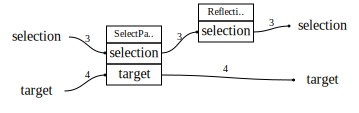

In [2]:
U = get_walk_operator_for_1d_Ising_model(4, 2e-1)
show_bloq(U.decompose_bloq())

`GeneralizedQSP` implements the Quantum Eigenvalue Transform on a unitary $U$ using QSP. Given a complex QSP polynomial $P$ (and its complement $Q$), it implements the unitary:
$$U' = \begin{bmatrix} P(U) & \cdot \\ Q(U) & \cdot \end{bmatrix}$$

Here, the polynomials $P, Q$ must satisfy the following constraint:

$$\left\mid P(e^{i\theta}) \right\mid^2 + \left\mid Q(e^{i\theta}) \right\mid^2 = 1 ~~\text{for every}~ \theta \in [0, 2\pi]$$


Reference: https://arxiv.org/abs/2308.01501

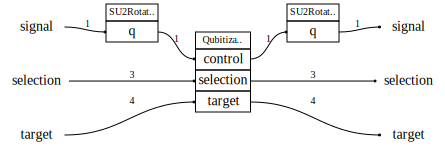

In [3]:
pU = GeneralizedQSP(U, P=(0.5, 0.5), Q=(0.5, -0.5))
show_bloq(pU.decompose_bloq())

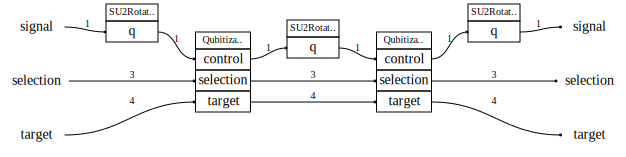

In [4]:
pU = GeneralizedQSP(U, P=(0.5, 0, 0.5), Q=(-0.5, 0, 0.5))
show_bloq(pU.decompose_bloq())